<div>
Olá, Monica!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>




# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [1]:
# Importe as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# leia os conjuntos de dados em DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
df_products = pd.read_csv('/datasets/products.csv', sep = ';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
df_departments = pd.read_csv('/datasets/departments.csv', sep = ';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- O método `head()` precisa ser utilizado para exibir uma amostra inicial dos seus dados
- Os imports foram executados em células separadas
- O conjunto de dados foi carregado corretamente usando o separador `;`
</div>


In [3]:
# imprima as informações sobre o DataFram
df_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# imprima as informações sobre o DataFrame
df_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# imprima as informações sobre o DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# imprima as informações sobre o DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# imprima as informações sobre o DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados
- as tabelas possuem valores ausentes
- todas as tabelas precisaram ser arrumadas, pois tem ; no lugar de ,
- days_since_prior_order na primeira tabela está como float64, porém dias não podem ser números flutuantes, somente inteiros


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `info()` foi utilizado para estudo inicial do conjunto de dados

</div>


# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados
- verificar se todas as colunas ID são números inteiros e caso contrário corrigir
- identificar e remover valores ausentes
- identificar e remover valores duplicados

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
# Verificar se há pedidos duplicados
print(df_orders[df_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há linhas duplicadas? Se sim, o que elas têm em comum?
existem várias linhas duplicadas. order_dow é sempre igual a 3 (quarta-feira) e order_four_of_day é sempre igual a 2 (2am)

In [9]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
df_orders_dow = df_orders['order_dow'] == 3
df_orders_dow = df_orders['order_hour_of_day'] == 2
print(df_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

O que esse resultado quer dizer?
que existem 121 pedidos feitos na quarta-feira as 2am

In [10]:
# Remova pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)
print(df_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
# Verifique as linhas duplicadas mais uma vez
print(df_orders.duplicated().sum())

0


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados
print(df_orders[df_orders.duplicated('user_id')]['user_id'])

# se eu já removi as linhas duplicadas, o que deveria aparecer aqui?

109        20084
354        65807
379        87345
729        18130
734       130466
           ...  
478947      5617
478948    112087
478949     82944
478950      4391
478951      1730
Name: user_id, Length: 321515, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.
Primeiro foi verificados se existiam linhas duplicadas, depois foi verificado o número de pedidos feito na quarta-feira as 2am, depois foram removidas as linhas duplicadas e depois foi verificado se ainda existiam linhas duplciadas

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados para o dataset `orders` foram verificados
- Aqui você não precisa importar a biblioteca pandas novamente
- Seria útil imprimir a quantidade de valores duplicados
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante verificou corretamente que pedidos duplicados ocorreram às 2:00 da manhã de Quarta-feira, o que pode sugerir um erro na geração dos dados.
</div>



### DataFrame `products`

In [13]:
# Verifique se há linhas completamente duplicadas

df_products = df_products.drop_duplicates()

print(df_products)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [14]:
# Verifique apenas se há IDs de departamentos duplicados
df_products_duplicated = df_products[df_products.duplicated('department_id')]

print(df_products_duplicated)


       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4               

In [15]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products['product_name'] = df_products['product_name'].str.lower()

df_products_lower = df_products['product_name'].duplicated()

print(df_products)

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               5                          green chile anytime sauce   
...           ...                                                ...   
49689       49690                      high performance energy drink   
49690       49691                      original pancake & waffle mix   
49691       49692    organic instant oatmeal light maple brown sugar   
49692       49693                             spring water body wash   
49693       49694                            burrito- steak & cheese   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [16]:
# Verifique os nomes de produtos duplicados que não estão faltando

df_products_clean = df_products.dropna(subset=['product_name'])

df_product_names_not_missing = df_products_clean[df_products_lower]

print(df_product_names_not_missing)

       product_id                                     product_name  aisle_id  \
2058         2059                                  biotin 1000 mcg        47   
5455         5456                 green tea with ginseng and honey        96   
5558         5559                           cream of mushroom soup        69   
7558         7559                        cinnamon rolls with icing       105   
9037         9038                           american cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
2058            

/tmp/ipykernel_27/1071061383.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_product_names_not_missing = df_products_clean[df_products_lower]


Descreva brevemente suas conclusões e o que você fez com elas.
- não encontrei linha completamente duplicadas
- foi verificado os valores duplciados para as linhas ID de departamento e nome de produto
- foi colocado em minusculo todos os nomes dos produtos

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O estudante removeu as linhas duplicadas. Dica: `drop_duplicates(inplace=True)` para operações inplace
    
- Sugestão: resete os índices do seu dataframe após a operação de remoção de duplicados para resetar os valores originais (`.reset_index(drop=True)`)
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Você poderia utilizar `df.duplicated().sum()` para imprimir a quantidade de linhas duplicadas por coluna
- Os nomes dos produtos foram convertidos para `lowercase` para padronização
- As conclusões intermediárias foram apresentadas

<br>
<div class="alert alert-block alert-danger">
- Entretanto, você precisa usar o método `.head()`para exibir uma amostra dos seus dados
</div>

</div>


### DataFrame `departments`

In [17]:
# Verifique se há linhas completamente duplicadas
df_departments = df_departments.drop_duplicates()

print(df_departments)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [18]:
# Verifique apenas se há IDs dos produtos duplicados
df_departments_duplicated = df_departments[df_departments.duplicated('department_id')]

print(df_departments_duplicated)
# existe ID dos produtos?

Empty DataFrame
Columns: [department_id, department]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.
não foram encontrados linhas completamente duplicadas
no segundo codigo não sei se escrevi algo errado ou se não tem produtos duplicados

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


### DataFrame `aisles`

In [19]:
# Verifique se há linhas completamente duplicadas
df_aisles = df_aisles.drop_duplicates()

print(df_aisles)


     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [20]:
# Verifique apenas se há IDs dos produtos duplicados
df_aisles_ids = df_aisles[df_aisles.duplicated('aisle_id')]

print(df_aisles_ids)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.
não foram encontrados linhas completamente ausentes
no segundo codigo, não sei se escrevi errado ou se nãi tem produtos duplicados

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas
df_order_products = df_order_products.drop_duplicates()

print(df_order_products)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]


In [22]:
# Verifique mais uma vez se há outros casos complicados de duplicados

df_add_to_cart_order = df_order_products[df_order_products.duplicated('add_to_cart_order')]


print(df_add_to_cart_order)


         order_id  product_id  add_to_cart_order  reordered
2         2261212       26683                1.0          1
6          644579       12341                5.0          1
9          420019       23315                4.0          1
12         522547       40571               10.0          1
14        1961225       37553                1.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4544942 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.
nesse caso, pelo que eu consegui pelos meus codigos, não existe linhas inteiras duplicadas, mas existe alguns valores duplcados na coluna add_to_cart_order

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Encontre valores ausentes na coluna 'product_name'
print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.
existem mais de 1000 valores ausentes na coluna 'product_name', todos aparentemente estão com valor NaN e estão na mesma seção e tem o mesmo ID de departamento

In [24]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.
colocando mais uma condição, que seria seria o ID de são igual a 100, é possivel comparar o número de linhas
como o resultado é igual, podemos concluir que todos os produtos ausentes estão associados a essa seção

In [25]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
print(df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões. (coloquei uma nova linha, pois exclui a original sem querer e não consegui voltar)
assim como na seção anteior, todos os produtos ausentes estão associados ao departamento 21

In [26]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
df_department_21 = df_departments.query("department_id == 21")[['department', 'department_id']]

df_aisles_100 = df_aisles.query("aisle_id == 100")[['aisle', 'aisle_id']]

print(df_department_21)
print()
print(df_aisles_100)


   department  department_id
20    missing             21

      aisle  aisle_id
99  missing       100


Descreva brevemente suas conclusões.
os valores tanto no departmento 21 como na seção 100 estão com valor missing

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

print(df_products)
print()
df_products.info()

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               5                          green chile anytime sauce   
...           ...                                                ...   
49689       49690                      high performance energy drink   
49690       49691                      original pancake & waffle mix   
49691       49692    organic instant oatmeal light maple brown sugar   
49692       49693                             spring water body wash   
49693       49694                            burrito- steak & cheese   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A verificação de que os produtos com nomes vazios estão associados com o `departamento==21` e `aisle==100` foi realizada.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os produtos com nomes ausentes foram preenchidos com `Unknown`.
</div>


Descreva brevemente suas conclusões e o que você fez com elas.
substituindo os valores ausentes por Unknown e imprimindo as informações da tabela, agora mostra todas as linhas com os mesmo valores e sem valores ausentes

### DataFrame `orders`

In [28]:
# Encontre os valores ausentes
print(df_orders[df_orders['days_since_prior_order'].isna()])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [29]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
print(df_orders[(df_orders['days_since_prior_order'].isna()) & (~df_orders['order_number'] == 1)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.
a primeira condição mostra que a valores ausentes, mas quando colocamos a segunda condição, que é se existe valore ausentes para clientes que não estão fazendo o primeiro pedido, o resultado é vazio
com isso, podemos concluir que todos os valores ausentes estão associados ao primeiro pedido

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante apresentou as observações sobre o atributo `days_since_prior_order`.
</div>


### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes
print(df_order_products[df_order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [31]:
# Quais são os valores mínimo e máximo dessa coluna?
min_value = df_order_products['add_to_cart_order'].min()

max_value = df_order_products['add_to_cart_order'].max()

print(min_value)
print(max_value)

1.0
64.0


Descreva brevemente suas conclusões.
existem 836 linhas com valores ausentes na coluna add_to_cart_order e dentre os valores não ausentes dessa coluna o valor minimo é 1 e o valor maximo é 64

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
print(df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique())

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

df_missing = df_order_products[df_order_products['add_to_cart_order'].isna()]
group_missing = df_missing.groupby('order_id')['product_id'].count()
min_order = group_missing.min()
min_64 = min_order > 64

print(min_64)
print()
df_missing = df_order_products[df_order_products['add_to_cart_order'].isna()]

group_id = df_missing.groupby(by='order_id')['product_id'].count()
                                        
print(group_id)
print()

group_missing_min = df_missing.groupby('order_id')['product_id'].count()

min_order = group_missing_min.min()

print(min_order)

False

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

1


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os métodos `min()` e `max()` foram utilizados para contar a quantidade mínima e máxima de produtos adicionados ao carrinho
- Os valores ausentes do atributo `add_to_cart_order` foram preenchidos
- As conclusões intermediárias foram apresentadas
</div>


Descreva brevemente suas conclusões.
- não existem pedidos com valores ausente que contem mais de 64 produtos
- o valor minimo de contagem é 1



In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'].fillna('999', inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

print(df_order_products)
print()
df_order_products.info(show_counts=True)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  i

Descreva brevemente suas conclusões e o que você fez com elas.
subistitui os valores ausentes pelo valor 999 e transformei essa coluna em integer

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
- Aqui você precisa usar o argumento `show_counts=True` para mostrar a quantidade de valores não nulos.
    
Referência: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
</s>
</div>


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados
foi possivel ver que existiam varios valores duplicados e ausentes
foram excluidos os valores duplicados 
onde existiam valores ausentes, eles foram substituidos por outro valor e transformando ele em um valor não ausente

#tive algumas duvidas e não sei se os codigos eestão corretos, porém eles rodaram
#na substituição dos valores ausentes, ao imprimir os valores ele impimi todos os valore e eu não consegui imprimir somente as linhas com os valores que eu substitui, quando tentei fazer isso, imprimiu vazio

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
def order_hour(order_hour_of_day):
    if order_hour_of_day >= 0 and order_hour_of_day <= 23:
        return 'faz sentido'
    else:
        return 'não faz sentido'
    
df_orders['order_hour'] = df_orders['order_hour_of_day'].apply(order_hour).value_counts()

print(df_orders)
print()

print(df_orders['order_hour_of_day'].describe())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  order_hour  
0                         30.0         NaN  
1                          9.0   

In [36]:
def dow_order(order_dow):
    if order_dow >= 0 and order_dow <= 6:
        return 'faz sentido'
    else:
        return 'não faz sentido'
    
df_orders['dow_order'] = df_orders['order_dow'].apply(dow_order).value_counts()

print(df_orders)
print()




        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  order_hour  dow_order  
0                         30.0         NaN        NaN  
1          

Escreva suas conclusões aqui
como mostrado, todos os valores fazem sentido

#usei a função all(), que consegui pesquisando na internet, pois não sabia como saber see todos os valores faziam sentido, pois com o print não se mostra todas as linhas. não lembro se aprendi essa função na aula, mas foi a solução para saber se todos faziam sentido. teria outra função?

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Outras sugestões: 
- verificar o intervalo das horas do dia
- usar o método `.value_counts()`
- plotar a distribuição dessa variável
</div


### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

<AxesSubplot:>

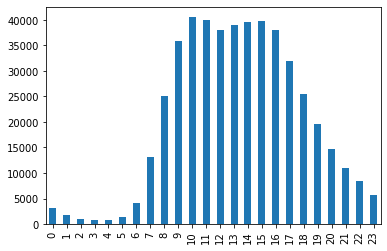

In [37]:
hour_count = df_orders['order_hour_of_day'].value_counts().sort_index()

hour_count.plot(kind='bar')




Escreva suas conclusões aqui
- pelo grafico é possivel ver que os horarios em que há mais venda é entre 9 e 17
- nas primeiras horas do dia, as vendas são quase nulas
- depois das 17, as vendas caem, porém ainda existe uma venda consideravel
- com isso, é possivel dizer que um bom horario para se abrir a loja seria das 6 as 00



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Sugestão: aqui você deve usar um gráfico de barra ou histograma. Você primeiro precisa agrupar os dados pela dimensão de hora e depois fazer a contagem.
    
<br>
    
Referência: https://medium.com/@carvalho.natalia03/como-criar-um-histograma-de-frequ%C3%AAncias-em-python-c46c93f52637
</s>
</div


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Esse gráfico não está correto. Aqui  você precisa plotar a quantidade de usuários que fazem pedido a cada hora do dia.
    
Sugestão:
    
```python
hour_counts = orders['order_hour_of_day'].value_counts().sort_index()
...
```
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Aqui ainda precisamos de ajustes. Por favor, veja a referência que foi fornecida como exemplo.</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito!
</div>

### [A3] Em que dia da semana as pessoas fazem compras?

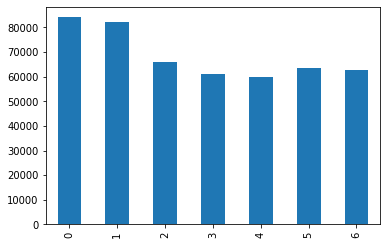

In [38]:
dow_orders = df_orders['order_dow'].value_counts().sort_index()
dow_orders.plot(x = 'order_hour_of_day', y = 'order_id', kind = 'bar')

plt.show()

Escreva suas conclusões aqui
- não sei se as colunas selecionadas estão corretas
- as vendas são bem equilibradas entres os dias da semana



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Sugestão: Você primeiro precisa agrupar os dados pela dimensão de hora e depois fazer a contagem.
    
<br>
    
```python
orders['order_dow'].value_counts()...

    OU
    
orders.groupby('order_dow').count()...  
```
    
A mesma sugestão se aplica a outras perguntas semelhantes abaixo.

<br> 

Referência: https://www.statology.org/pandas-groupby-bar-plot/
</s>
</div


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>O código está com erro nesse trecho.</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Aqui ainda precisamos de ajustes. Por favor, veja a referência que foi fornecida como exemplo.</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Os seus dados estão corretos, mas as labels não estão adequadas. O ideal seria ter o dia da semana (0 a 6) em cada barra. Uma pequena alteração na sua função de agregação pode te ajudar.
    
```python
df_orders['order_dow'].value_counts().sort_index()
...
```
</s>
</div>

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

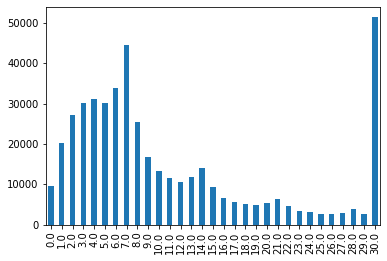

In [39]:
day_orders = df_orders['days_since_prior_order'].value_counts().sort_index()
day_orders.plot(x = 'user_id', y = 'order_id', kind = 'bar')

plt.show()

Escreva suas conclusões aqui
- pelo grafico é possivel perceber que normalmente ou as pessoas demoram menos de 7 dias ou 30
- principalmengte entre 15 e 29 dias, poucas pessoas fazem um novo pedido
- ou seja, ou demora poucos dias ou em torno de um mês


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Tente usar a mesma dica fornecidade na questão anterior. Além disso, verifique no gráfico a região de maior contentração para elaborar a sua resposta. Exemplo: a maior barra no seu gráfico representa a região que contém maior número de usuários.
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Aqui você precisa adicionar as suas conclusões. Qual a maior barra no gráfico acima? Interpretar os dados do gráfico é uma habilidade muito importante!</s>
</div>

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [40]:
df_dow_wed = df_orders[df_orders['order_dow'] == 3].groupby('order_hour_of_day').size()
print(df_dow_wed)

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
dtype: int64


In [41]:
df_dow_sat = df_orders[df_orders['order_dow'] == 6].groupby('order_hour_of_day').size()
print(df_dow_sat)

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
dtype: int64


<AxesSubplot:xlabel='order_hour_of_day'>

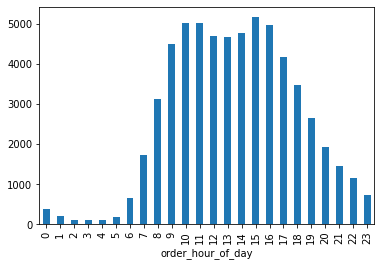

In [42]:
df_dow_wed.plot(x = 'order_dow', y = 'order_hour_of_day', kind = 'bar')

<AxesSubplot:xlabel='order_hour_of_day'>

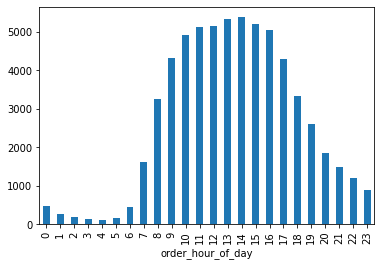

In [43]:
df_dow_sat.plot(x = 'order_dow', y = 'order_hour_of_day', kind = 'bar')

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Aqui deveria ser Sábado ao invés de Sexta-feira.</s>
</div>

Escreva suas conclusões aqui
- as maiores vendas ocorrem durenta o periodo das 9 as 21
- não existe muita diferença entre as vendas de quarta e de sabado
- as vendas totais de sabado são superiores as vendas totais de quarta, porém na parte da manhá as vendas de quarta são um pouco superiores


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Tente, através dos gráficos, encontrar pequenas diferenças entre as distribuições.</s>
</div>

### [B2] Qual é a distribuição do número de pedidos por cliente?

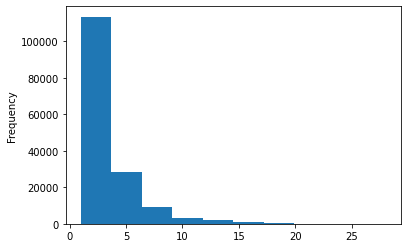

In [44]:
df_orders_grouped = df_orders.groupby('user_id').size()
df_orders_grouped.plot(kind='hist')

plt.show()

Escreva suas conclusões aqui
- pelo grafico, é possivel perceber que a maioria dos clientes estão entre 1 pedido e 5 pedidos
- o número maximo de pedidos é 20
- não sei se é necessario fazer algum codigo na segunda linha
- a maioria dos clientes faz até 10 pedidos

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas sua conclusão poderia incluir que a maioria dos clientes faz até 10 pedidos.
</div>

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [53]:
df_popular = df_order_products.merge(df_products, on= 'product_id')
popular_products = df_popular['product_name'].value_counts().head(20)
popular_products.to_frame()


,product_name
banana,66050
bag of organic bananas,53297
organic strawberries,37039
organic baby spinach,33971
organic hass avocado,29773
organic avocado,24689
large lemon,21495
strawberries,20018
limes,19690
organic whole milk,19600


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Nessa questão, você precisa fazer o join entre o `dataframe` de pedidos e produtos para pegar os nomes dos produtos. Além disso, exiba um dataframe ao final.
    
```python
    order_products.merge(..., on='..')
```
</s>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Aqui você não precisa do `print()`, pois o notebook já renderiza a estrutura de dados. Além disso, pode usar o método `to_frame()` para converter para dataframe se já não estiver. Referência: https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html
</s>    
</div>

Escreva suas conclusões aqui
- com o codigo .to_frame mostrou um dataframe bem organizado
- pelo resultado é possivel perceber que a maioria dos itens mais populares são frutas 



# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [55]:
count_products = df_order_products.groupby('order_id')['product_id'].count()


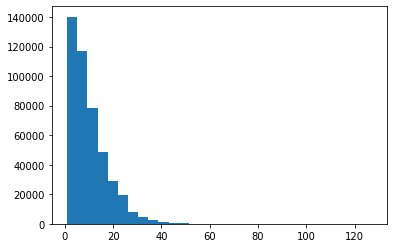

In [66]:
plt.hist(count_products, bins=30)
plt.show()

Escreva suas conclusões aqui
- a maior concentração fica na região entre 0 e 20



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
- Aqui você precisa plotar um histograma ou gráfico de barras para exibir a forma da distribuição dos dados
- Ao plotar a distribuição, verifique se faz sentido filtrar a região mais concentrada nos dados para evitar que o gráfico fique muito carregado (< ~35 pedidos)
</s>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
- Aqui você precisa analisar a região de maior concentração e não o valor máximo. Dica: aumente os `bins` do seu histograma para poder visualizar as faixas de valores com mais facilidade.
</s>
</div>

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [82]:
df_merge = df_order_products.merge(df_products, on='product_id')

reordered_products = df_merge[df_merge['reordered'] == 1]

top_reordered_products = reordered_products.groupby(['product_id', 'product_name']).size().reset_index(name='count')

top_reordered_products = top_reordered_products.sort_values(by='count', ascending=False)

print(top_reordered_products.head(20))

       product_id              product_name  count
18104       24852                    banana  55763
9528        13176    bag of organic bananas  44450
15368       21137      organic strawberries  28639
15936       21903      organic baby spinach  26233
34407       47209      organic hass avocado  23629
34828       47766           organic avocado  18743
20285       27845        organic whole milk  16251
34725       47626               large lemon  15044
20375       27966       organic raspberries  14748
12193       16797              strawberries  13945
19088       26209                     limes  13327
16700       22935      organic yellow onion  11145
18186       24964            organic garlic  10411
32792       45007          organic zucchini  10076
36219       49683            cucumber kirby   9538
20543       28204        organic fuji apple   8989
5978         8277  apple honeycrisp organic   8836
28607       39275       organic blueberries   8799
4267         5876             o

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Aqui você precisa fazer algo parecido com a última da questão da seção B, com a diferença de que precisa filtrar pedidos com `reordered==1`.
</s>
</div>


Escreva suas conclusões aqui
- a tabela acima mostra os 20 produtos mais frequentemente colocados no carrinho em pedidos repetidos
- a tabela mostra que a maioria são frutas

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Os resultados para essa questão não estão corretos. Dica: verifique a necessidade de fazer o `merge` entre os dataframes de compras e os de produtos. Abaixo, apresento uma amostra do resultado esperado para essa tarefa para que você possa validar o seu trabalho 

```python

df_merge = order_products.merge(..., on='...')
top_products = df_merge.groupby([.., ..]).size().sort_values(['order_id'], ascending=False)
…

product_id  product_name         	    count   
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629

```
</s>

</div>

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

Escreva suas conclusões aqui

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [85]:
df_popular = df_order_products.merge(df_products, on= 'product_id')
popular_add = df_popular[df_popular['add_to_cart_order'] == 1]
popular_count_add = popular_add.groupby(['product_id', 'product_name']).size().reset_index(name='count')
popular_count_add = popular_count_add.sort_values(by='count', ascending=False)
print(popular_count_add.head(20))


       product_id                 product_name  count
13414       24852                       banana  15562
7127        13176       bag of organic bananas  11026
15028       27845           organic whole milk   4363
11384       21137         organic strawberries   3946
25439       47209         organic hass avocado   3390
11786       21903         organic baby spinach   3336
25732       47766              organic avocado   3044
10622       19660                 spring water   2336
9050        16797                 strawberries   2308
15102       27966          organic raspberries   2024
24024       44632   sparkling water grapefruit   1914
26519       49235          organic half & half   1797
25658       47626                  large lemon   1737
115           196                         soda   1733
20853       38689     organic reduced fat milk   1397
14158       26209                        limes   1370
6660        12341                hass avocados   1340
3153         5785  organic r

Escreva suas conclusões aqui
- a tabela mostra os 20 principais itens colocados no carrinho
- a maioria é fruta
- a tabela é semelhante a tabela de produtos mais vendidos
- e com isso, é possivel concluir que os produtos mais populares em sua maioria tambem são colocados antes dos outros

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Os resultados para essa questão não estão corretos. Dica: verifique a necessidade de fazer o `merge` entre os `dataframes` de compras e os de produtos e/ou filtrar pela flag `add_to_cart_order`. Abaixo, apresento uma amostra do resultado esperado para essa tarefa para que você possa validar o seu trabalho 

```python
   	product_id	product_name		count
0	24852	Banana	                  15562
1	13176	Bag of Organic Bananas	  11026
2	27845	Organic Whole Milk	      4363
3	21137	Organic Strawberries		3946
4	47209	Organic Hass Avocado	    3390
```
</s>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Os resultados para essa questão ainda não estão corretos. Verifique o exemplo fornecido acima do resultado esperado para te orientar na sua solução.
</s>
</div>

# Conclusão geral do projeto:

Conclusão
- foi possivel organizar as tabelas fornecidas
- foi possivel verificar se existiam valores duplciados ou ausentes
- quando foram encontrados valores dupliciados, foi possivel exclui-los
- quando foram encontrados valores ausentes, foi possivel substitui-los
- depois, foi possivel analisar os graficos, com relação aos produtos mais vendidos, a diferença entre os dias da semana,
a frequencia de compra, o tempo entre os pedidos, entre outros


<div class="alert alert-block alert-danger">
<b> Comentário do revisor </b> <a class="tocSkip"></a>

Adicione suas conclusões gerais.

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor v2 </b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
Essa versão do seu projeto ficou muito boa, você avançou bastante. Entretanto, deixei alguns comentários em questões que precisam de ajustes no código para avançarmos.
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v3 </b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
Essa versão do seu projeto ficou muito boa, você avançou bastante. Entretanto, deixei alguns comentários em questões que precisam de ajustes no código para avançarmos. 
    
<br>
    
**Dica:** veja as referências que compartilhei com você, elas podem te ajudar a finalizar a primeira parte [A] e uma parte da seção [B]. Após ajustar esses pontos, podemos avançar para as análises mais complexas.
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v4 </b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
Essa versão do seu projeto ficou muito boa, você avançou bastante. Entretanto, deixei alguns comentários em questões que precisam de ajustes no código para avançarmos. Você está no caminho certo, não desanime!
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v5 </b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
Essa versão do seu projeto ficou muito boa, você avançou bastante. Peço que valide a sua solução com os exemplos fornecidos de saída esperada. Caso esteja muito diferente do resultado, revise as sugestões fornecidas em cada etapa para ajustar o seu código
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v6</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>